In [1]:
import scanpy as sc
import torch
import numpy as np

random_seed = 0
np.random.seed(random_seed)
torch.manual_seed(random_seed)

In [2]:
import pandas as pd
import os
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_124584/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [4]:
from utils.util import run_pca
import magic
import warnings
from train_metric import train_metric_learner
import networkx as nx
import sklearn

In [5]:
import os
try:
		if os.path.exists("tree_6.rds"):
			%R dataset <- readRDS("tree_6.rds")
		else:
			print("File 'tree_6.rds' not found.")
except:
		if os.path.exists("tree_6.rds"):
			%R dataset <- readRDS("tree_6.rds")
		else:
			print("File 'tree_6.rds' not found.")

In [6]:
%%R
str(dataset)

List of 19
 $ id                   : chr "synthetic/dyntoy/tree_6"
 $ cell_ids             : chr [1:4880] "C1" "C2" "C3" "C4" ...
 $ cell_info            :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	4880 obs. of  1 variable:
  ..$ cell_id: chr [1:4880] "C1" "C2" "C3" "C4" ...
 $ model                : chr "tree"
 $ milestone_ids        : chr [1:12] "M1" "M10" "M11" "M12" ...
 $ milestone_network    :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	11 obs. of  4 variables:
  ..$ from    : chr [1:11] "M3" "M3" "M3" "M6" ...
  ..$ to      : chr [1:11] "M4" "M5" "M2" "M7" ...
  ..$ length  : num [1:11] 0.522 0.591 0.722 0.149 0.445 ...
  ..$ directed: logi [1:11] TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ divergence_regions   :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	7 obs. of  3 variables:
  ..$ divergence_id: chr [1:7] "divergence_M6" "divergence_M6" "divergence_M6" "divergence_M8" ...
  ..$ milestone_id : chr [1:7] "M6" "M7" "M8" "M8" ...
  ..$ is_start     : logi [1:7] TRUE FALSE FALSE TRUE FALSE FA

In [7]:
expression_df = 1

In [8]:
%%R -o expression_df
expression_df <- as.data.frame(dataset$expression)

In [9]:
expression_df

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G3861,G3862,G3863,G3864,G3865,G3866,G3867,G3868,G3869,G3870
C1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.988823,...,0.0,0.000000,2.794574,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
C2,0.000000,0.000000,0.000000,0.0,0.000000,1.787280,0.000000,0.000000,0.000000,0.000000,...,0.0,4.527616,0.000000,0.000000,5.373369,0.000000,0.000000,0.000000,0.0,6.73363
C3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,5.902891,0.000000,5.856388,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
C4,0.000000,0.000000,0.000000,0.0,5.686773,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,6.718062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
C5,0.000000,7.190506,6.139802,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,6.874765,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C4973,0.000000,0.000000,0.000000,0.0,4.966774,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.712938,0.0,0.00000
C4974,0.000000,0.000000,0.000000,0.0,6.340976,0.000000,0.000000,0.000000,0.000000,3.842363,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.493714,0.000000,0.0,0.00000
C4975,0.000000,0.000000,0.000000,0.0,0.000000,7.256302,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
C4976,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.828678,5.882403,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,6.001736,0.000000,0.000000,0.0,0.00000


In [10]:
data = sc.AnnData(expression_df)

In [11]:
from utils.util import run_pca

# Apply PCA on the raw data for initial denoising
print('Computing PCA...')
X_pca, va, n_comps = run_pca(data, use_hvg=False, n_components=300)
data.obsm['X_pca'] = X_pca
print(f'Components computed: {n_comps}')

Computing PCA...
Runtime for run_pca(): 18.754857301712036
Components computed: 300


In [12]:
import magic

# Apply MAGIC for PCA data denoising
magic_op = magic.MAGIC(random_state=random_seed, solver='approximate', n_pca=n_comps)
X_magic = magic_op.fit_transform(data.X, genes='pca_only')
data.obsm['X_magic_pca'] = X_magic

Calculating MAGIC...
  Running MAGIC on 4880 cells and 3870 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 18.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 10.35 seconds.
    Calculating affinities...
    Calculated affinities in 9.47 seconds.
  Calculated graph and diffusion operator in 37.88 seconds.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 38.04 seconds.


In [13]:
import warnings
from train_metric import train_metric_learner

with warnings.catch_warnings():
    # Filter out user warnings from PyTorch about saving scheduler state
    warnings.simplefilter("ignore")
    train_metric_learner(data, n_episodes=5, n_metric_epochs=30, obsm_data_key='X_magic_pca', code_size=10,
        backend='leiden', device='cpu', save_path='./metric',
        cluster_kwargs={'random_state': 0, 'resolution': 1.0}, nn_kwargs={'random_state': 0, 'n_neighbors': 50},
        trainer_kwargs={'optimizer': 'SGD', 'lr': 0.01, 'batch_size': 256}
    )

Generating initial clusters


Runtime for determine_cell_clusters(): 11.751497268676758
Training for episode: 1


100%|██████████| 4880/4880 [00:00<00:00, 4941.33it/s]


Re-generating clusters for episode: 1
Runtime for determine_cell_clusters(): 2.6654257774353027
Time Elapsed for epoch: 54.994922161102295s
Training for episode: 2


100%|██████████| 4880/4880 [00:01<00:00, 3862.98it/s]


Re-generating clusters for episode: 2
Runtime for determine_cell_clusters(): 3.048495292663574
Time Elapsed for epoch: 61.21295619010925s
Training for episode: 3


100%|██████████| 4880/4880 [00:01<00:00, 4452.22it/s]


Re-generating clusters for episode: 3
Runtime for determine_cell_clusters(): 2.503906726837158
Time Elapsed for epoch: 55.2467577457428s
Training for episode: 4


100%|██████████| 4880/4880 [00:01<00:00, 2801.70it/s]


Re-generating clusters for episode: 4
Runtime for determine_cell_clusters(): 3.2017929553985596
Time Elapsed for epoch: 61.18763875961304s
Training for episode: 5


100%|██████████| 4880/4880 [00:01<00:00, 4356.47it/s]


Re-generating clusters for episode: 5
Runtime for determine_cell_clusters(): 2.695058584213257
Time Elapsed for epoch: 57.01771640777588s
Runtime for train_metric_learner(): 302.9620020389557


In [14]:
data.obsm

AxisArrays with keys: X_pca, X_magic_pca, metric_embedding

In [15]:
import magic

magic_op = magic.MAGIC(random_state=0, solver='approximate')
X_magic = magic_op.fit_transform(data.X, genes='all_genes')
data.obsm['X_magic'] = X_magic

Calculating MAGIC...
  Running MAGIC on 4880 cells and 3870 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.18 seconds.
    Calculating affinities...
    Calculated affinities in 1.88 seconds.
  Calculated graph and diffusion operator in 12.94 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 13.69 seconds.


In [16]:
import numpy as np
from models.ti.connectivity import compute_directed_cluster_connectivity, compute_undirected_cluster_connectivity
from models.ti.graph import compute_trajectory_graph, compute_connectivity_graph
from utils.plot import plot_connectivity_graph, plot_trajectory_graph
from utils.util import get_start_cell_cluster_id

In [17]:
start_cell_ids = 1

In [18]:
%%R -o start_cell_ids
start_cell_ids = dataset$prior_information$start_id

In [19]:
start_cell_ids = list(start_cell_ids)
start_cell_ids

['C1599']

In [20]:
communities = data.obs['metric_clusters'].astype(int)
adj_conn = data.obsp['connectivities']
adj_dist = data.obsp['distances']
# start_cell_ids = data.obs['palantir_pseudotime'].idxmin()
# start_cell_ids = [start_cell_ids] if isinstance(start_cell_ids, str) else list(start_cell_ids)
start_cluster_ids = get_start_cell_cluster_id(data, start_cell_ids, communities)
start_cluster_ids

{12}

In [21]:
# un_connectivity, un_z_score = compute_undirected_cluster_connectivity(communities, adj_conn, z_threshold=2.5)

In [22]:
import matplotlib as mp
import networkx as nx


def plot_connectivity_graph_with_gene_expressions(
    ad,
    cluster_connectivities,
    gene,
    embedding_key="X_met_embedding",
    comm_key="metric_clusters",
    magic_key="X_magic",
    mode="undirected",
    cmap="YlGn",
    figsize=(16, 12),
    node_size=400,
    font_color="black",
    title=None,
    save_path=None,
    save_kwargs={},
    offset=0,
    **kwargs,
):
    try:
        X_embedded = ad.obsm[embedding_key]
    except KeyError:
        raise Exception(f"Key {embedding_key} not found in {ad}")

    try:
        communities = ad.obs[comm_key]
    except KeyError:
        raise Exception(f"Key {comm_key} not found in {ad}")

    try:
        X_imputed = pd.DataFrame(
            ad.obsm[magic_key], index=ad.obs_names, columns=ad.var_names
        )
    except KeyError:
        print("MAGIC imputed data not found. Using raw counts instead")
        X_imputed = ad.to_df()

    if gene not in ad.var_names:
        raise ValueError(f"Gene: {gene} was not found.")

    g, node_positions = compute_connectivity_graph(
        X_embedded, communities, cluster_connectivities, mode=mode
    )

    # Normalize and compute cluster wise mean expression of the gene
    X_gene = X_imputed[gene]
    X_gene = (X_gene - X_gene.min()) / (X_gene.max() - X_gene.min())
    gene_exprs = []
    for cluster_id in np.unique(communities):
        ids = communities == cluster_id
        mean_gene_expr = X_gene.loc[ids].mean()
        gene_exprs.append(mean_gene_expr)

    # Draw the graph
    plt.figure(figsize=figsize)
    if title is not None:
        plt.title(title)
    plt.axis("off")
    edge_weights = [offset + w for _, _, w in g.edges.data("weight")]
    nx.draw_networkx(
        g,
        pos=node_positions,
        cmap=cmap,
        node_color=gene_exprs,
        font_color=font_color,
        node_size=node_size,
        width=edge_weights,
        **kwargs,
    )
    # Setup color bar
    vmin = np.min(gene_exprs)
    vmax = np.max(gene_exprs)
    normalize = mp.colors.Normalize(vmin=vmin, vmax=vmax)
    cax, _ = mp.colorbar.make_axes(plt.gca(), aspect=20, shrink=0.6, anchor=(-0.3, 0.5))
    mp.colorbar.ColorbarBase(cax, norm=normalize, cmap=plt.get_cmap(cmap))

    if save_path is not None:
        plt.savefig(save_path, **save_kwargs)
    plt.show()

In [23]:
# from utils.plot import plot_connectivity_graph_with_gene_expressions

# plot_connectivity_graph_with_gene_expressions(
#     data,
#     un_connectivity,
#     'THBD',
#     font_color='white',
#     cmap='viridis',
#     offset=0.2,
#     node_size=750,
#     font_size=12,
#     comm_key='metric_clusters',
#     save_path='/content/connectivity_CSF1R.png',
#     save_kwargs={
#         'dpi': 300,
#         'bbox_inches': 'tight',
#         'transparent': True
#     }
# )

In [24]:
# if 'metric_clustering_scores' in data.uns:
#     # Convert each element in the list to string
#     data.uns['metric_clustering_scores'] = [
#         str(x) for x in data.uns['metric_clustering_scores']
#     ]


In [25]:
# def sanitize_uns(data):
#     for key in list(data.uns.keys()):
#         # Handle lists
#         if isinstance(data.uns[key], list):
#             data.uns[key] = [str(x) for x in data.uns[key]]
#         # Handle DataFrames
#         elif isinstance(data.uns[key], pd.DataFrame):
#             data.uns[key] = data.uns[key].astype(str)
#     return data

# data = sanitize_uns(data)


In [26]:
# # Convert categorical columns to strings
# for col in data.obs.select_dtypes(['category', 'object']):
#     data.obs[col] = data.obs[col].astype(str).fillna('')


In [27]:
# data.write("tree_6_processed.h5ad")

In [28]:
# sc.read("tree_6_processed.h5ad")

In [29]:
import networkx as nx

from sklearn.neighbors import NearestNeighbors
from models.ti.pseudotime import compute_pseudotime
from models.ti.pseudotime_v2 import compute_pseudotime
from models.ti.graph import compute_trajectory_graph_v2
from utils.plot import plot_trajectory_graph_v2
from utils.plot import plot_pseudotime

In [30]:
X = data.obsm['metric_embedding']

n_neighbors = 30
nbrs = NearestNeighbors(n_neighbors=n_neighbors, metric="euclidean").fit(X)
adj_dist = nbrs.kneighbors_graph(X, mode="distance")
adj_conn = nbrs.kneighbors_graph(X)

In [31]:
data.obsm["X_met_embedding"] = data.obsm["metric_embedding"]

In [32]:
un_connectivity = pd.read_csv("un_connectivity.csv", index_col=0)

In [33]:
un_connectivity.index = un_connectivity.index.astype(int)
un_connectivity.columns = un_connectivity.columns.astype(int)


In [34]:
# Convert pandas/categorical types to numpy.int64
data.obs['metric_clusters'] = data.obs['metric_clusters'].astype(int)
communities = data.obs['metric_clusters'].astype(int)


In [41]:
# v2 pseudotime
G_undirected, node_positions = compute_connectivity_graph(data.obsm['X_met_embedding'], data.obs['metric_clusters'], un_connectivity)
adj_cluster = nx.to_pandas_adjacency(G_undirected)
pseudotime = compute_pseudotime(data, start_cell_ids, adj_dist, adj_cluster)

Runtime for compute_connectivity_graph(): 0.008493423461914062
Runtime for compute_pseudotime(): 4.096233129501343


In [51]:
pseudotime==0

C1       True
C2       True
C3       True
C4       True
C5       True
         ... 
C4973    True
C4974    True
C4975    True
C4976    True
C4977    True
Length: 4880, dtype: bool

In [37]:
from umap import UMAP

# Reduce 10D embeddings to 2D
reducer = UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(data.obsm['metric_embedding'])


/home/satwik/margaret-env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [38]:
data.obsm["X_met_embedding"] = embeddings_2d

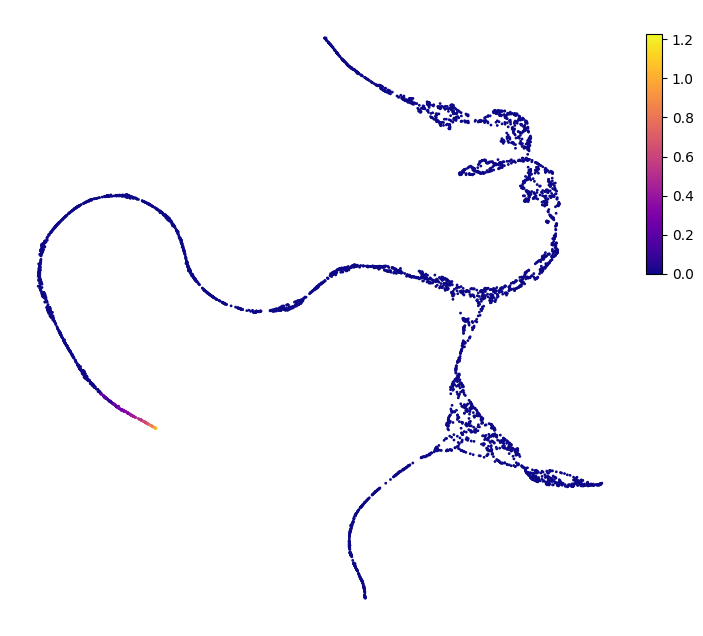

In [43]:
plot_pseudotime(
    data,
    embedding_key="X_met_embedding",
    pseudotime_key="metric_pseudotime_v2",
    s=1,
    cmap='plasma',
    figsize=(8, 8),
    cb_axes_pos=[0.92, 0.55, 0.02, 0.3]
)